# Estadística 1: frecuencia de palabras por partido

# Combinar este cuaderno y el de total de palabras

Qué queremos buscar:
- Un primer vistazo a las frecuencias de palabras. Similitudes y diferencias superficiales entre los distintos partidos.
- Mostrar los sesgos del dataset: Por cantidad de textos de ciertos partidos y por el lenguaje utilizado (Señorías, ustedes...)

Cómo? Estadisticas (global y por partido):
- Número de palabras totales 
- Palabras/intervención
- Palabras más comunes (TF)


## Carga dataset

In [1]:
import pandas as pd

In [2]:
corpus = pd.read_csv("dataset/dataset_v1_2/dataset_v1_2.csv")
corpus["fecha"] = pd.to_datetime(corpus["fecha"], format="%Y-%m-%d")

In [3]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  12107 non-null  int64         
 1   numero      12107 non-null  int64         
 2   fecha       12107 non-null  datetime64[ns]
 3   apellidos   12107 non-null  object        
 4   grupo       12107 non-null  object        
 5   texto       12107 non-null  object        
 6   color       12107 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 662.2+ KB


In [4]:
corpus.head()

,Unnamed: 0,numero,fecha,apellidos,grupo,texto,color
0,0,1,2019-12-03,ZAMARRÓN MORENO,Socialista,"Señorías, se abre la sesión. En virtud de lo ...",#e30713
1,1,1,2019-12-03,ZAMARRÓN MORENO,Socialista,De conformidad con lo dispuesto en el artícul...,#e30713
2,2,1,2019-12-03,ROSIQUE I SALTOR,Republicano,"Artículo 5 del Real Decreto 551/2019, de 24 d...",#fbc259
3,3,1,2019-12-03,ZAMARRÓN MORENO,Socialista,Las señoras secretarias de la Mesa procederán...,#e30713
4,4,1,2019-12-03,ROSIQUE I SALTOR,Republicano,"Junqueras i Vies, Oriol; Forn Chiariello, Joa...",#fbc259


## Número de intervenciones y palabras

Una primera estadística puede ser la cantidad de palabras. Para ello separams los textos (por espacios), y contamos el numero de palabras.

In [24]:
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('jupyterlab')
#alt.data_transformers.enable('json')

RendererRegistry.enable('jupyterlab')

Se puede ver, que el grupo con más intervenciones es el grupo socialista. COn 3500 intervenciones. EN el caso opuesto, los grupos Republicano y son los que menos con aproximadamente 1000 intevrneciones.

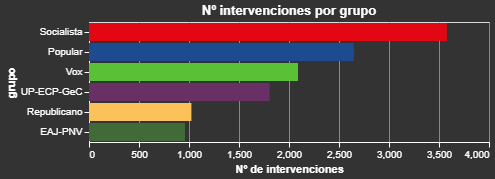

In [45]:
alt.Chart(corpus[["grupo", "color"]], title="Nº intervenciones por grupo").transform_aggregate(
    n_interv='count(*)',
    groupby=["grupo", "color"]
).mark_bar().encode(
    x=alt.X("n_interv:Q", title="Nº de intervenciones"),
    y=alt.Y("grupo:N", sort="-x"),
    color=alt.Color("color:N", scale=None)
)

Si tenemos en cuenta las palabras, las proporciones son similares. EL grupo socialista supera los 2.3M de palabras mientras que los grupos nacionalista no llegan a las 800K palabras.

In [27]:
corpus["n_words"] = corpus["texto"].str.split(" ").apply(len)

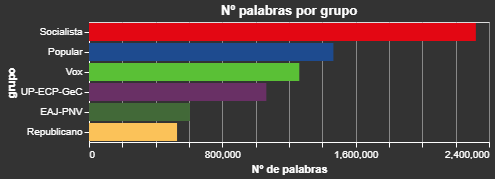

In [46]:
alt.Chart(corpus[["grupo", "color", "n_words"]], title="Nº palabras por grupo").transform_aggregate(
    sum_n_words='sum(n_words)',
    groupby=["grupo", "color"]
).mark_bar().encode(
    x=alt.X("sum_n_words:Q", title="Nº de palabras"),
    y=alt.Y("grupo:N", sort="-x"),
    color=alt.Color("color", scale=None)
)

La duración promedio de cada interveneción (en número de palabras) es similar en todos los grupos políticos.

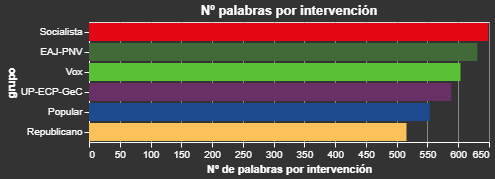

In [47]:
alt.Chart(corpus[["grupo", "color", "n_words"]], title="Nº palabras por intervención").transform_aggregate(
    sumwords='sum(n_words)',
    ninterv='count(*)',
    groupby=["grupo", "color"]
).transform_calculate(
    words_per_interv = alt.datum.sumwords / alt.datum.ninterv
).mark_bar().encode(
    x=alt.X("mean(words_per_interv):Q", title="Nº de palabras por intervención"),
    y=alt.Y("grupo:N", sort="-x"),
    color=alt.Color("color", scale=None)
)

## Frecuencia de palabras

Se van a extraer la frecuencia de cada palabra en cada intervención. Se tendrán en cuenta todas las palabras excepto *stopwords* comúnes del español.

Para realizarlo se utiliza la clase `CountVectorizer` de sklearn.

In [30]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
textos = corpus["texto"]

La mtriz de frecuencias se compondría de 78022 columnas, es un dataset muuuuy grande. Para evitar problemas de memoria, se utilizan únicamente las 10K palabras más comúnes.

Altair funciona mejor con datasets en *long-form*, en el que cada fila corresponde con una observación junto con sus metadatos. Es necesario transformarlo antes de visualizar, para ello se utiliza la función `melt` de pandas.

In [32]:
vectorizer_ = CountVectorizer(max_features=10000, stop_words=stopwords.words("spanish"))
X_ = vectorizer_.fit_transform(corpus["texto"])    

tf_df = pd.DataFrame(X_.toarray(), columns=vectorizer_.get_feature_names_out())
tf_df

,000,016,10,100,1000,103,104,11,110,1100,...,últimas,último,últimos,única,únicamente,únicas,único,únicos,útil,útiles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
12104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12105,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Se agrupan por grupo, y transforma a long-form

In [33]:
tf_df["grupo"] = corpus["grupo"]
tf_df["color"] = corpus["color"]

In [34]:
tf_df_viz = tf_df.groupby("grupo").sum(numeric_only=True).melt(ignore_index=False, var_name="_termino", value_name="_frecuencia")

In [35]:
tf_df_viz = tf_df.groupby(
    ["grupo", "color"]).sum(
    numeric_only=True).melt(
    ignore_index=False, var_name="_termino", value_name="_frecuencia").reset_index()

### Palabras más frecuentes

Como es normal, entre as palabras más frecuentes se encuentran *gobierno*, *ustedes*, *usted*, *señor*. *ley*, etc. Es curioso observar que también aparece la palabra aplausos. Esto es debido a que en el dataset, cada vez que se escuchan aplausos en el hemiciclo se anota en el diario de sesiones entre parétesis.

### Global apilado

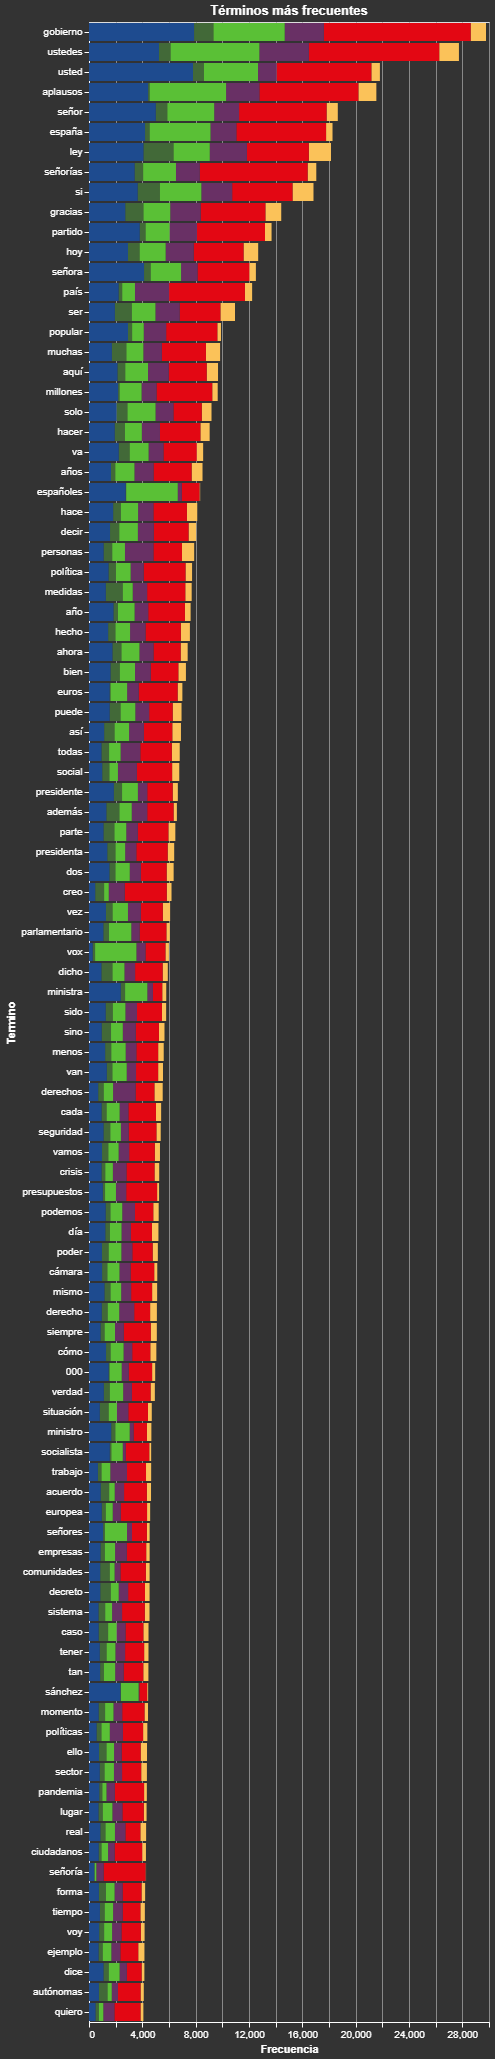

In [48]:
alt.Chart(
    tf_df_viz[
        tf_df_viz["_termino"
                 ].isin(tf_df_viz.groupby("_termino").sum(numeric_only=True).sort_values("_frecuencia", ascending=False).head(100).index)]
    , title=f"Términos más frecuentes"
).mark_bar().encode(
        y=alt.Y("_termino:N", title="Termino", sort="-x"),
        x=alt.X("sum(_frecuencia):Q", title="Frecuencia"),
    color=alt.Color("color", scale=None)
)

## Conclusiones

En ete cuaderno se han descrito los textos mediante la frecuencia de las palabras. Para ello e ha utilizado una matriz de frecuencias con las 20K palabras mas freceuntes del corpus de las que se han eliminado los stopwords. Se han mostrado 2 tipos de gráficas: por grupo político y globales. Se ha podido ver que existen algunas diferencias entre los distintos partidos, y tambien algunas similitudes.

Existen dos incovenientes con este método. POr un lado, partidos políticos con con mayor cantidad de texos tienen mayor peso en el cómputo global. Sería conveniente normalizar la frecuencia de las palabras de algún modo al agrupar por partido. Por otro lado, hay palabras que son muy frecuentes en todos los tipos de textos (pej: señorías o usted). Esto impide ver dierencias con claridad. Para solucionarlo, se puede tener en cuenta otras medidas de peso, como puede ser TF-IDF. Mostrar los DF más altos puede dar una visión clara de este problema.

Otro punto interesante podría ser fijarnos en algunas palabras, por ejemplo:
- Comprobar la forma de referirse al interpelado, fijandose en las palabras como "usted", "ustedes", "señorías", "señor" o "señora".
- Ver la cantidad de aplausos por intervención
- Estudio de la variablidad léxica de cada uno de los grupos